In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Lectura del archivo generado en transform.ipynb

In [2]:
df = pd.read_csv('../data/train_user_collapsed_small_data.csv')
x = df.drop(columns=['customer_ID', 'target'])
y = df['target']

Definición de las X e Y tanto de train como de test, teniendo al test como el 30% de los datos del dataset obtenido del csv. Seguido de ello, se hace uso del MLPClassifier, que genera una red neuronal con las siguientes iteraciones:
-3 capas ocultas de 80, 60 y 15 nodos
-500 iteraciones máximas (épocas)
-función de activación empleada: ReLu
-algoritmo solucionador: adam

Seguido de ello, se ace un fit de x e y del test

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state= 1)


In [4]:
clf = MLPClassifier(hidden_layer_sizes=(80, 65), max_iter=75, activation = 'relu', solver = 'adam', random_state=1, learning_rate_init= 0.001)


In [5]:
train_score = []
test_score = []
for i in range (clf.max_iter):
    clf.partial_fit(x_train, y_train, classes = np.unique(y_train))
    train_score.append(clf.score(x_train, y_train))
    clf.partial_fit(x_test, y_test, classes = np.unique(y_train))
    test_score.append(clf.score(x_test, y_test))


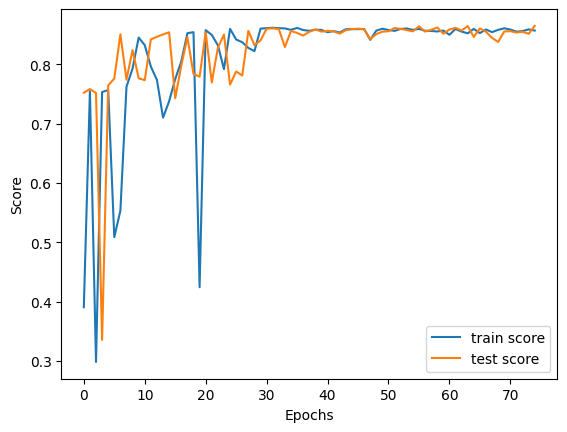

In [6]:
plt.plot(train_score, label ="train score")
plt.plot(test_score, label = "test score")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.legend()
plt.show()

In [7]:
clf.fit(x_test, y_test)

MLPClassifier(hidden_layer_sizes=(80, 65), max_iter=75, random_state=1)

Se obtiene la matriz de salida de predicción, llamado también como target

In [8]:
y_pred = clf.predict(x_test)
y_pred

array([1., 0., 0., ..., 1., 1., 0.])

Se calcula el porcentaje de confianza del modelo, basando en el cálculo interno de la matriz de confusión empleando como el x_test e y_test

In [9]:
clf.score(x_test, y_test)

0.8512413601624947

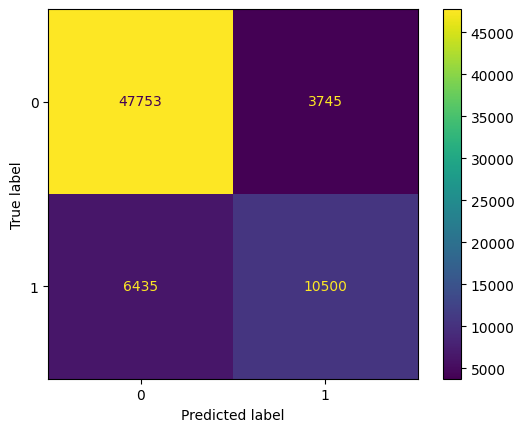

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [31]:
a,b,c,d = cm.ravel()
(a,b,c,d)

(47753, 3745, 6435, 10500)

In [48]:
percentage_A = a / (a + b) #True positives = True positives / (True positives + false positives)
percentage_D = d / (d + c) #True positives = True negatives / (True negatives + false negatives)
print("Precission in true positives (A):",percentage_A," Precission in true negatives (D):",percentage_D)

Precission in true positives (A): 0.9272787292710396  Precission in true negatives (D): 0.6200177147918512
